In [9]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = [[1+variance*np.random.randn(1)[0], 1+variance*np.random.randn(1)[0]]]
    self.biases = [[0+variance*np.random.randn(1)[0], -0.5+variance*np.random.randn(1)[0]]]

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases


# Dense Layer 2
class Layer_Dense_Out:
  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = [[2+variance*np.random.randn(1)[0]],[-4+variance*np.random.randn(1)[0]]]
    self.biases = [[0+variance*np.random.randn(1)[0]]]

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases

In [4]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

In [5]:
# Data Flow at every level

def Forward_Pass(input,pos):

  layer_dict_in[pos].forward(input)
  layer_dict_act1[pos].forward(layer_dict_in[pos].output)
  layer_dict_out[pos].forward(layer_dict_act1[pos].output)
  layer_dict_act2[pos].forward(layer_dict_out[pos].output)

  return layer_dict_out[pos].output[0][0]

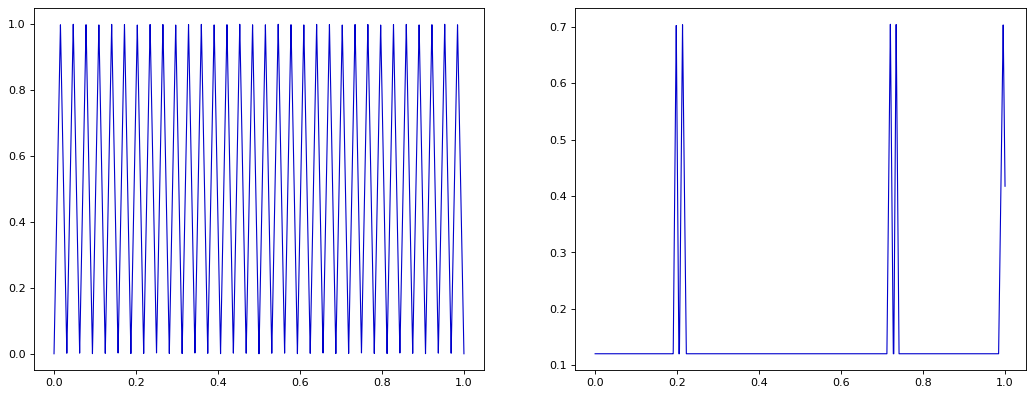

In [15]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Variance
# * Image Resolution

layer_dict_in, layer_dict_out, layer_dict_act1, layer_dict_act2 = dict(), dict(), dict(), dict()

depth = 6
variance = 0.0
X_granularity = 12587
test_X = np.linspace(0,1,num=X_granularity, endpoint=True)
test_X_plot = np.linspace(0,1,num=X_granularity, endpoint=True)
 
# Layer Initialization
for i in range(depth):
  layer_dict_in[i] = Layer_Dense_In(1,2,variance)
  layer_dict_out[i] = Layer_Dense_Out(2,1,variance)
  layer_dict_act1[i] = Activation_ReLU()
  layer_dict_act2[i] = Activation_ReLU()

# Function calculation
for iter in range(len(test_X)):
  for pos in range(depth):
    test_X_plot[iter] = Forward_Pass(test_X_plot[iter],pos)

layer_dict_in, layer_dict_out, layer_dict_act1, layer_dict_act2 = dict(), dict(), dict(), dict()

depth = 6
variance = 0.1
X_granularity = 12587
test_X = np.linspace(0,1,num=X_granularity, endpoint=True)
test_X_plot_var = np.linspace(0,1,num=X_granularity, endpoint=True)
 
# Layer Initialization
for i in range(depth):
  layer_dict_in[i] = Layer_Dense_In(1,2,variance)
  layer_dict_out[i] = Layer_Dense_Out(2,1,variance)
  layer_dict_act1[i] = Activation_ReLU()
  layer_dict_act2[i] = Activation_ReLU()

# Function calculation
for iter in range(len(test_X)):
  for pos in range(depth):
    test_X_plot_var[iter] = Forward_Pass(test_X_plot_var[iter],pos)

# Plots
figure(figsize=(16, 6), dpi=80)
#plt.figure(dpi=600)
plt.subplot(1, 2, 1)
plt.plot(test_X,test_X_plot,linewidth=1,c='mediumblue')
plt.subplot(1, 2, 2)
plt.plot(test_X,test_X_plot_var,linewidth=1,c='mediumblue')
#plt.tight_layout()
plt.show()

In [85]:
# Run this cell to save the weights and biases of the network
import pickle

with open('weights1.pickle', 'wb') as handle:
    pickle.dump(layer_dict_in, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('weights2.pickle', 'wb') as handle:
    pickle.dump(layer_dict_out, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Run this cell to load the weights and biases of the network
with open('weights1.pickle', 'rb') as handle:
    layer_dict_in = pickle.load(handle)

with open('weights2.pickle', 'rb') as handle:
    layer_dict_out = pickle.load(handle)